### **A Comparative Analysis of Public Sentiment on Twitter towards Apple and Google Products using Natural Language Processing.**  


**Group Name: Group 5**

**Members**
1. *Rose Miriti*
2. *Isaac Wadhare*
3. *Lydia Chumba*
4. *Erick Mauti*
5. *Marilyn Akinyi*
6. *Rodgers Otieno*
7. *Samwel Ongechi*

**Technical Mentor: George Kamundia**

**Phase: Phase 4 Project**


# Sentiment Analysis of Tweets on Apple and Google Products

##  Summary

This project focuses on analyzing public sentiment expressed on Twitter regarding Apple and Google products, using a labeled dataset of over 9,000 tweets categorized as positive, negative, or neutral. The goal is to build a proof-of-concept NLP model capable of classifying tweets according to sentiment, providing actionable insights that can guide business strategy, marketing, and product development for the two companies.

The workflow begins with **business and data understanding**, where the problem is defined, the dataset is explored, and the distribution of sentiment classes is analyzed. The **data preparation** stage includes text cleaning, tokenization, stopword removal, and lemmatization and stemming. Text data will then be transformed into numerical representations using TF-IDF vectors or word embeddings, creating features suitable for machine learning models.

For **modeling**, baseline models such as Logistic Regression and Naive Bayes will be implemented first to establish performance benchmarks. For advanced modeling, we will implement a **neural network**. We will also employ Ensemble methods like Random Forest and Gradient Boosting (XGBoost). 

A **validation strategy** using stratified train-test splits and K-Fold cross-validation will ensure the models generalize well to unseen data. **Evaluation metrics** will include accuracy, precision, recall, F1-score, and confusion matrices to assess multiclass classification performance. The project will produce insights into public sentiment trends, which will directly inform recommendations answering key objectives regarding customer perception, sentiment drivers, and business strategies.


## Business Problem

Apple and Google face continuous public scrutiny on social media regarding product launches and services. Understanding real-time customer sentiment is critical to improve products, marketing strategies, and customer satisfaction.  

**Business problem:**  
*"Can we automatically classify the sentiment of tweets about Apple and Google products to support actionable business insights?"*


## Project Objectives

1. **Determine the overall public sentiment** towards Apple and Google products on Twitter.  
2. **Identify tweet characteristics and themes** that contribute to positive, negative, or neutral sentiment.  
3. **Provide actionable insights** from sentiment trends to inform business decisions, marketing strategies, and product improvements.  

## 1.0 Importing the necessary libraries for the analysis

In [11]:
# Import essential libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import NLTK specific modules
from nltk.corpus import stopwords, gutenberg
import contractions
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist, bigrams, trigrams, ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk import CFG, ChartParser
from nltk import pos_tag
from wordcloud import WordCloud


# Import scikit-learn for machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import time
import joblib


# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("Environment setup complete!")

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

All libraries imported successfully!
Environment setup complete!


## 1.1 Loading the dataset
- Loading the data into a pandas DataFrame and view the first 5 records.

In [12]:
df = pd.read_csv('Data\judge-1377884607_tweet_product_company.csv', encoding = 'latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 1.2 Data Inspecting 
- Data structure


In [13]:
print("Data Structure")
print(f"Shape: {df.shape} \n")
print(f'{df.info()} \n')  
print("OBSERVATION:")
print(f"There are {df.shape[1]} features. " )
print(f"And {df.shape[0]} records in our dataset." )
print("All features are categorical.")
print("There are missing values in two columns: 'tweet_text' and 'emotion_in_tweet_is_directed_at'.")

Data Structure
Shape: (9093, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None 

OBSERVATION:
There are 3 features. 
And 9093 records in our dataset.
All features are categorical.
There are missing values in two columns: 'tweet_text' and 'emotion_in_tweet_is_directed_at'.


In [14]:
print((df.isnull().sum()/len(df))*100)

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64


### Observation
- **Missing Values**:  
  - `tweet_text`: 0.01%  
  - `emotion_in_tweet_is_directed_at`: 63.8% missing values.  
  - Target column has **no missing values**. 

In [15]:
# Checking for duplicates
print(f"There are {df.duplicated().sum()} duplicates in our dataset. \nWe need to drop them to prevent false outcome .")

There are 22 duplicates in our dataset. 
We need to drop them to prevent false outcome .


- Check uniques values for sentiment features and their frequency

In [16]:
print(f"{df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()} \n")

print("Observation:")
print("There is need to merge neutral sentiments and remove the word 'emotion' from positive and negative sentiments")
print("Neutral emotions holds more than 50% of the dataset")


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64 

Observation:
There is need to merge neutral sentiments and remove the word 'emotion' from positive and negative sentiments
Neutral emotions holds more than 50% of the dataset


## 2.0 Data Cleaning
**Involves 3 stages:**

### 2.1 Stage 1:
Involves:
- **Column Standardization** - Shortening names for easy reference 
- **Removing duplicates**- Preventing duplicate samples from overweighting certain classes hence every unique tweet target pair appears only once.
- **Mapping sentiment unique values**- Consolidates the neutral emotions and remove emotions from the other parameter

- For this project, we simplify the dataset into three main sentiment classes: 
**positive, negative, and neutral.**  
- **"Positive emotion": Positive**  
- **"Negative emotion" : Negative**  
- **"I can't tell" : Neutral**  
  This reflects uncertainty. It is not clear whether the sentiment is  positive or 
  negative. Mapping it to *neutral* ensures 
  the model doesn’t misinterpret it as an opinion.

- **"No emotion toward brand or product": Neutral**  
  This explicitly signals the absence of any emotional reaction hence it fits best under *neutral*.

In [17]:
# Column Standardization
df = df.rename(columns= {'tweet_text':'text','emotion_in_tweet_is_directed_at':'brand',
                         'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'})


#Removing duplicates
df = df.drop_duplicates()

#Mapping sentiment unique values
sentiment_mapping = {
    'Negative emotion': 'Negative', 
    'Positive emotion':'Positive',
    'No emotion toward brand or product': 'Neutral',
    "I can't tell":'Neutral'
}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

### 2.2 Stage 2:
- **Handling missing values**
- Use a dictionary to populate either Apple or Google in all instances where the tweet contains the product names in the list<br>
Index will be used as keys in the dictionary for the sake of matching it with the tweet index later for appropriate categorization<br>
- Replacing null on the brand column with 'Unknown' for the remaining dataset. And dropping null values on the 'text' column the remaining null values

In [18]:
# Dropping null for text column
df = df.dropna(subset=['text'])

# Converting to lowercase for case-insensitive matching brand lists
google_products = [product.lower() for product in [
    "google", "gmail", "gdrive", "google drive", "gdocs", "google docs",
    "gsheets", "google sheets", "gslides", "google slides", "gmeet", "google meet",
    "google calendar", "chrome", "chromebook", "chromecast", "chromium",
    "pixel", "pixelbook", "nest", "google home", "android", "wear os", "play store",
    "google maps", "google earth", "waze", "google photos", "youtube", "yt music",
    "google cloud", "gcp", "google workspace", "google ads", "adsense", "doubleclick"
]]

apple_products = [product.lower() for product in [
    "apple", "icloud", "itunes", "apple music", "apple tv", "apple tv", "apple arcade",
    "apple pay", "apple news", "apple podcasts", "apple watch", "watchos",
    "iphone", "ipad", "ipados", "imac", "macbook", "macbook air", "macbook pro",
    "mac mini", "mac pro", "airpods", "airpods pro", "airpods max",
    "safari", "siri", "facetime", "imessage", "keynote", "numbers", "pages",
    "app store", "ios", "macos", "homepod", "find my", "testflight", "xcode", "iwatch", "mac","macpro"
]]

# Function to identify brand from text
def identify_brand_from_text(text):
    """
    Identify if text contains words related to Google or Apple products.
    Returns 'Apple', 'Google', or 'Unknown'.
    """
    if not isinstance(text, str) or pd.isna(text):
        return 'Unknown'
    
    text_lower = text.lower()
    
    # Check for Apple products
    for product in apple_products:
        if re.search(r'\b' + re.escape(product) + r'\b', text_lower):
            return 'Apple'
    
    # Check for Google products
    for product in google_products:
        if re.search(r'\b' + re.escape(product) + r'\b', text_lower):
            return 'Google'
    
    return 'Unknown'

# Check current brand distribution before imputation
print("Brand distribution BEFORE imputation:")
print(df['brand'].value_counts(dropna=False))
print(f"Missing brands: {df['brand'].isna().sum()}")

# Only impute brands for rows where brand is missing
mask = df['brand'].isna()
df.loc[mask, 'brand'] = df.loc[mask, 'text'].apply(identify_brand_from_text)

# Check brand distribution after imputation
print("\nBrand distribution AFTER imputation:")
print(df['brand'].value_counts(dropna=False))
print(f"Missing brands: {df['brand'].isna().sum()}")

# Check what was imputed
newly_imputed = df[df['brand'].notna() & mask].copy()
print(f"\nNewly imputed brands breakdown:")
print(newly_imputed['brand'].value_counts())

# Show some examples of newly imputed brands
print("\nSample of newly imputed texts:")
for i, row in newly_imputed.head(5).iterrows():
    text_preview = str(row['text'])[:100] + "..." if len(str(row['text'])) > 100 else str(row['text'])
    print(f"Text: {text_preview}")
    print(f"→ Imputed Brand: {row['brand']}")
    print("---")

Brand distribution BEFORE imputation:
brand
NaN                                5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64
Missing brands: 5788

Brand distribution AFTER imputation:
brand
Apple                              3834
Google                             2309
iPad                                945
Unknown                             732
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64
Missing brands: 0

Newly imputed brands

### 2.3 Stage 3:
- This involves specifically cleaning 'text' column which is very crucial for NLP.
 - **Convert emojis to text descriptions**- to preserve sentiment information.
 - **Lowercasing:** - Standardizing text records by converting them into lowercases
 - **Removing special characters:** - Strip URLs, mentions(@user), hashtags, emojis, and punctuation using regex(regular expressions)
 - **Handle contractions:**- Expand "don't" to "do not" (using contractions library)
 - **Remove numbers:** - Unless relevant like "iphone 16"
 - **Removing single letter words** - Like 'G' after removing 4 from '4G'


In [19]:
# Emoji conversion to text
def emoji_to_text(text):
    return emoji.demojize(text, delimiters=(" ", " "))

#Creating a function to help handle all the cleaning
#Creating a column to hold our cleaned text

def clean_text(text):
      text = text.lower() # Lowercase
      text = emoji_to_text(text)  # convert emojis to text
      text = contractions.fix(text) # Expand contractions
      text = re.sub(r'http\S+|@\w+|#\w+', '', text) # Remove URLs, mentions, hashtags
      text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
      text = re.sub(r"{link}", "", text)  # remove {link} placeholder
      text = re.sub(r'\d+', '', text) # Remove numbers
      text = re.sub(r'\b[a-zA-Z]\b', '', text) # removing single word letters 
      return text.strip()
df['cleaned_text'] = df['text'].apply(clean_text)


- **Removing word links and rt** - Do not add any value to the model

In [20]:
def remove_meaningless_words(text):
    """
    Remove RT, link, and related variations from text
    """
    if pd.isna(text):
        return text
    
    # Pattern to match rt/link variations 
    pattern = r'\b(rt|links?)\b[^\w]*'
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # Clean up extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Apply to our text
df['cleaned_text'] = df['cleaned_text'].apply(remove_meaningless_words)

### 2.4 Creating Ecosystems column
- Creating a map to identify the major ecosystems

In [21]:
# Ecosystem mapping definition
ecosystem_mapping = {
    # Apple Ecosystem
    'Apple': 'Apple',
    'iPad': 'Apple', 
    'iPhone': 'Apple',
    'iPad or iPhone App': 'Apple',
    'Other Apple product or service': 'Apple',
    
    # Google Ecosystem
    'Google': 'Google',
    'Android': 'Google',
    'Android App': 'Google',
    'Other Google product or service': 'Google',
    
    # Other/Unknown
    'Unknown': 'Unknown',
}

# Apply ecosystem mapping
df['ecosystem'] = df['brand'].map(ecosystem_mapping)

# Verify the mapping
print("Ecosystem Distribution:")
print(df['ecosystem'].value_counts())
print("\nOriginal brand to ecosystem mapping:")
print(df[['brand', 'ecosystem']].drop_duplicates().sort_values('brand'))

Ecosystem Distribution:
ecosystem
Apple      5579
Google     2759
Unknown     732
Name: count, dtype: int64

Original brand to ecosystem mapping:
                               brand ecosystem
7                            Android    Google
11                       Android App    Google
5                              Apple     Apple
4                             Google    Google
703   Other Apple product or service     Apple
13   Other Google product or service    Google
51                           Unknown   Unknown
2                               iPad     Apple
1                 iPad or iPhone App     Apple
0                             iPhone     Apple


In [22]:
df.to_csv('Ready_data.csv', index = 0)

In [23]:
df.head()

,text,brand,sentiment,cleaned_text,ecosystem
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,have iphone after hrs tweeting at it was dead ...,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,know about awesome ipadiphone app that you wil...,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,can not wait for also they should sale them do...,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,hope this years festival is not as crashy as t...,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,great stuff on fri marissa mayer google tim or...,Google


## 3.0 Exploratory Data Analysis(EDA)
At this stage, we explore the dataset to understand its characteristics. This includes:
- Checking the distribution of tweets across different sentiment labels.
- Identifying any class imbalance that may affect model performance.
- Outlier detection 
- Understanding the types of tokens present in the cleaned text.

The insights gained here will guide preprocessing and model selection in later stages.


### 3.1. Class Distribution.
- We visualize the distribution of sentiment labels to see how balanced or imbalanced the dataset is. This helps us understand which classes are underrepresented and may need special handling during modelling.

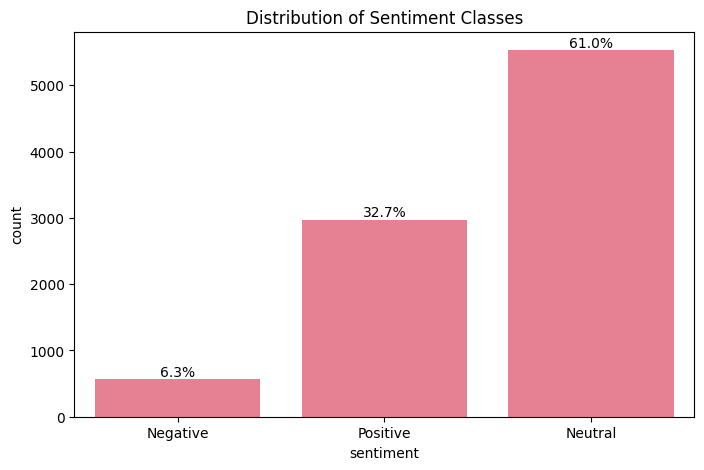

In [24]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Classes')

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.005 * total  # Slightly above the bar
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

### Observation
The dataset shows a **moderate class imbalance**:

- **Neutral:** 61% of tweets
- **Positive:** 32.7% of tweets  
- **Negative:** 6.3% of tweets  

1. The majority of tweets express **neutral** or **positive** sentiment.  
2. **Negative** sentiments are the minority class.  

- **There is need to employ algorithms that handle imbalance class well like 'SMOTE'.**

### 3.2. Brand Mentions in Tweets

We explore which brands the emotions in tweets are directed at. This helps us understand the distribution of emotions across different brands and highlights any underrepresented categories.

Sentiments per brand/product:

brand
Apple                              3834
Google                             2309
iPad                                945
Unknown                             732
iPad or iPhone App                  469
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64


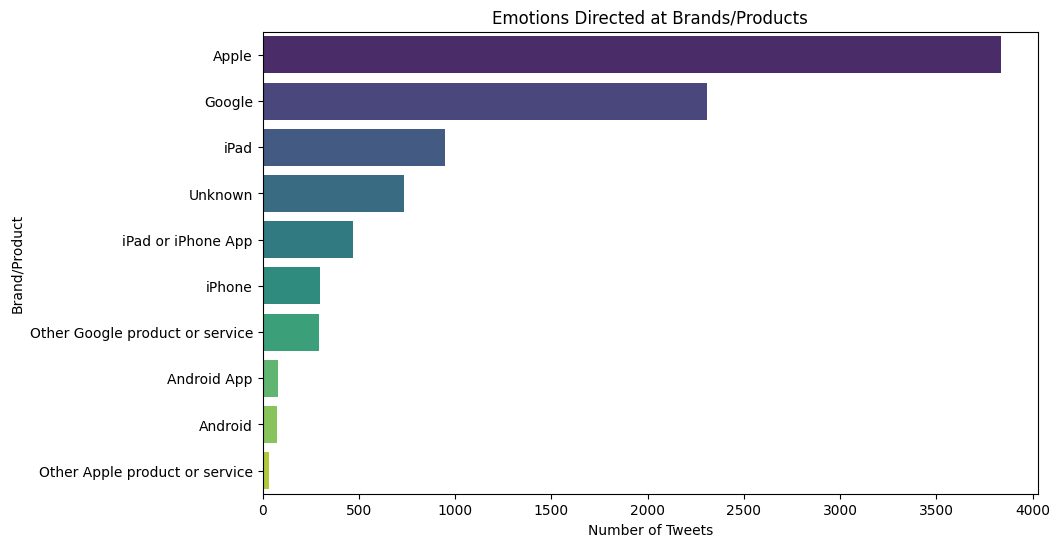

In [25]:
# Count of emotions directed at each brand/product
brand_counts = df['brand'].value_counts(ascending=False)

# Display the counts
print("Sentiments per brand/product:\n")
print(brand_counts)

# plot a bar chart for better visualization
plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="viridis")
plt.title("Emotions Directed at Brands/Products")
plt.xlabel("Number of Tweets")
plt.ylabel("Brand/Product")
plt.show()


### Top Observations:
1.  **Apple Dominates Emotion Mentions**
- Apple has the highest number of emotion mentions (3,834)
- This is 66% higher than Google's mentions (3,834 vs 2,309)
- Suggests Apple products generate stronger emotional responses or more discussion

2. **Brand vs Product Mention Patterns**
- Corporate brands dominate: Apple (3,834) + Google (2,309) = 6,143 mentions
- Specific products: iPad (945) + iPhone (296) = 1,241 mentions
- People mention corporate brands 5x more often than specific products

3. **Platform Comparison**
- Apple ecosystem: 3,834 (Apple) + 945 (iPad) + 296 (iPhone) + 35 (Other Apple) = 5,110 mentions
- Google ecosystem: 2,309 (Google) + 77 (Android) + 80 (Android App) + 293 (Other Google) = 2,759 mentions
- Apple has 85% more emotion mentions than Google overall

4. **App vs Hardware Focus**
- iPad or iPhone App mentions: 469
- Android App mentions: 80
- Apple app mentions are 5.8x higher than Android app mentions
- Suggests stronger emotional engagement with Apple's app ecosystem

5. **Significant Unknown Category**
- Unknown category has 732 mentions (3rd highest)
- This could represent:
  - Unclassified brands/products
  - Generic technology mentions

6. **Secondary Product Engagement**
- Other Google product/service: 293 mentions
- Other Apple product/service: Only 35 mentions
- Google's diverse product portfolio generates more discussion than Apple's secondary products

**Strategic Implications:**
- Apple generates stronger emotional engagement across its ecosystem
- Corporate branding matters more than individual product names in emotional discourse
- App experience is a significant emotional driver, especially for Apple
- Google has opportunity to increase emotional engagement with its broader product suite


### 3.3. WordCloud Visualization by Sentiment

To explore the most common words used in tweets for each sentiment `target_label`, we generate WordClouds. This visualization helps identify the frequent terms associated with
each class: Positive, Negative, or Neutral emotions toward brands or products.

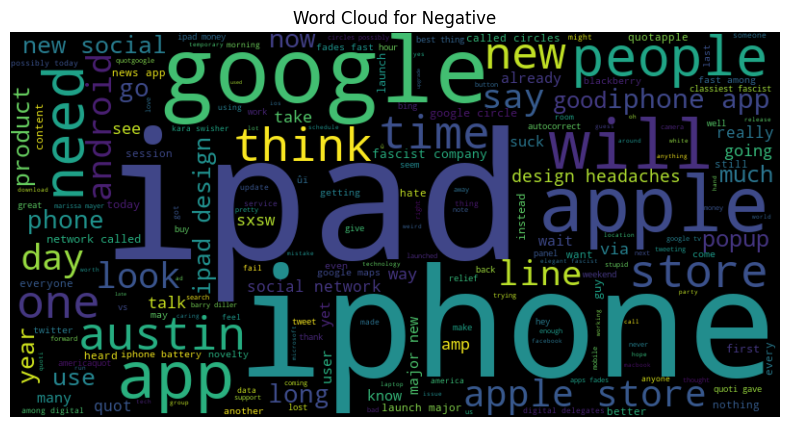

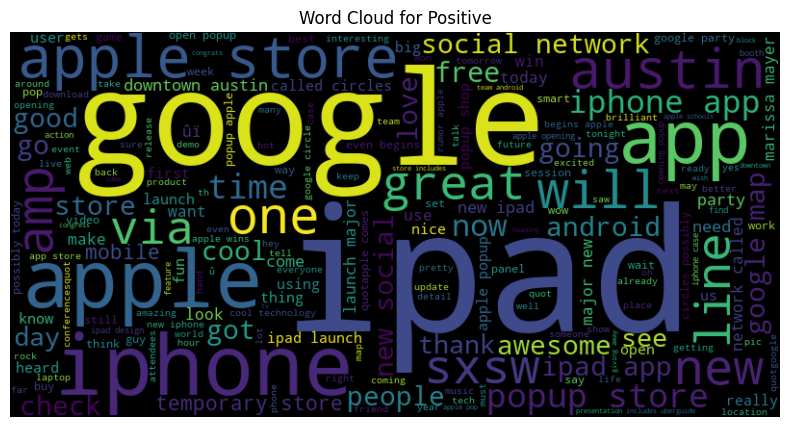

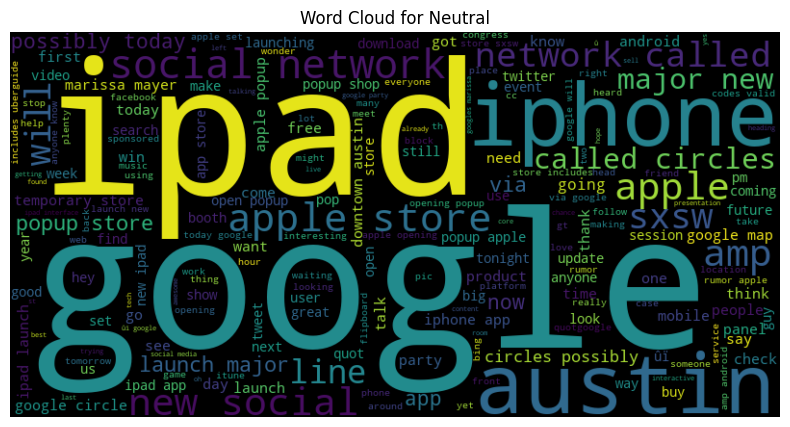

In [26]:
for sentiment in df['sentiment'].unique():
      text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
      wordcloud = WordCloud(width=800, height=400).generate(text)
      plt.figure(figsize=(10, 5))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title(f'Word Cloud for {sentiment}')
      plt.axis('off')
      plt.show()
      

### Interpretation of WordCloud visualization by Sentiment

**Negative:**  
Top words: `ipad`, `iphone`, `google`, `apple`, `not`, `app`, `store`, `new`.  
- Indicates that users expressing negative emotions often discuss Apple products and apps, with frequent mentions of `not` suggesting complaints or dissatisfaction.  

**Positive:**  
Top words:  `ipad`, `apple`, `google`, `store`, `app`, `iphone`, `new`, `austin`.  
- Positive tweets revolve around product mentions `ipad`, `apple`, `iphone` and sharing links, highlighting enthusiasm or promotional content.  

**Neutral:**  
Top words: `google`, `ipad`, `apple`, `store`, `new`, `iphone`, `launch`, `austin`.  
- Neutral tweets include general mentions of products, links, and retweets.  
- These words are common and do not convey strong sentiment, confirming their neutral classification.

### 3.4. Text Length Analysis by Sentiment Category
- Helps to investigate the relationship between text length (word count) and sentiment categories to uncover patterns in how emotional expression correlates with message length.

 -**Key Analytical Focus Areas:**
- **Outlier Detection:** Identify anomalous text lengths using boxplot visualization
- **Distribution Concentration:** Analyze data density patterns through violin plots
- **Skewness Assessment:** Determine distribution asymmetry using histogram KDE overlays
- **Behavioral Pattern Recognition:** Correlate message length with emotional expression styles
- **Statistical Validation:** Confirm patterns observed in visualizations with concrete numbers


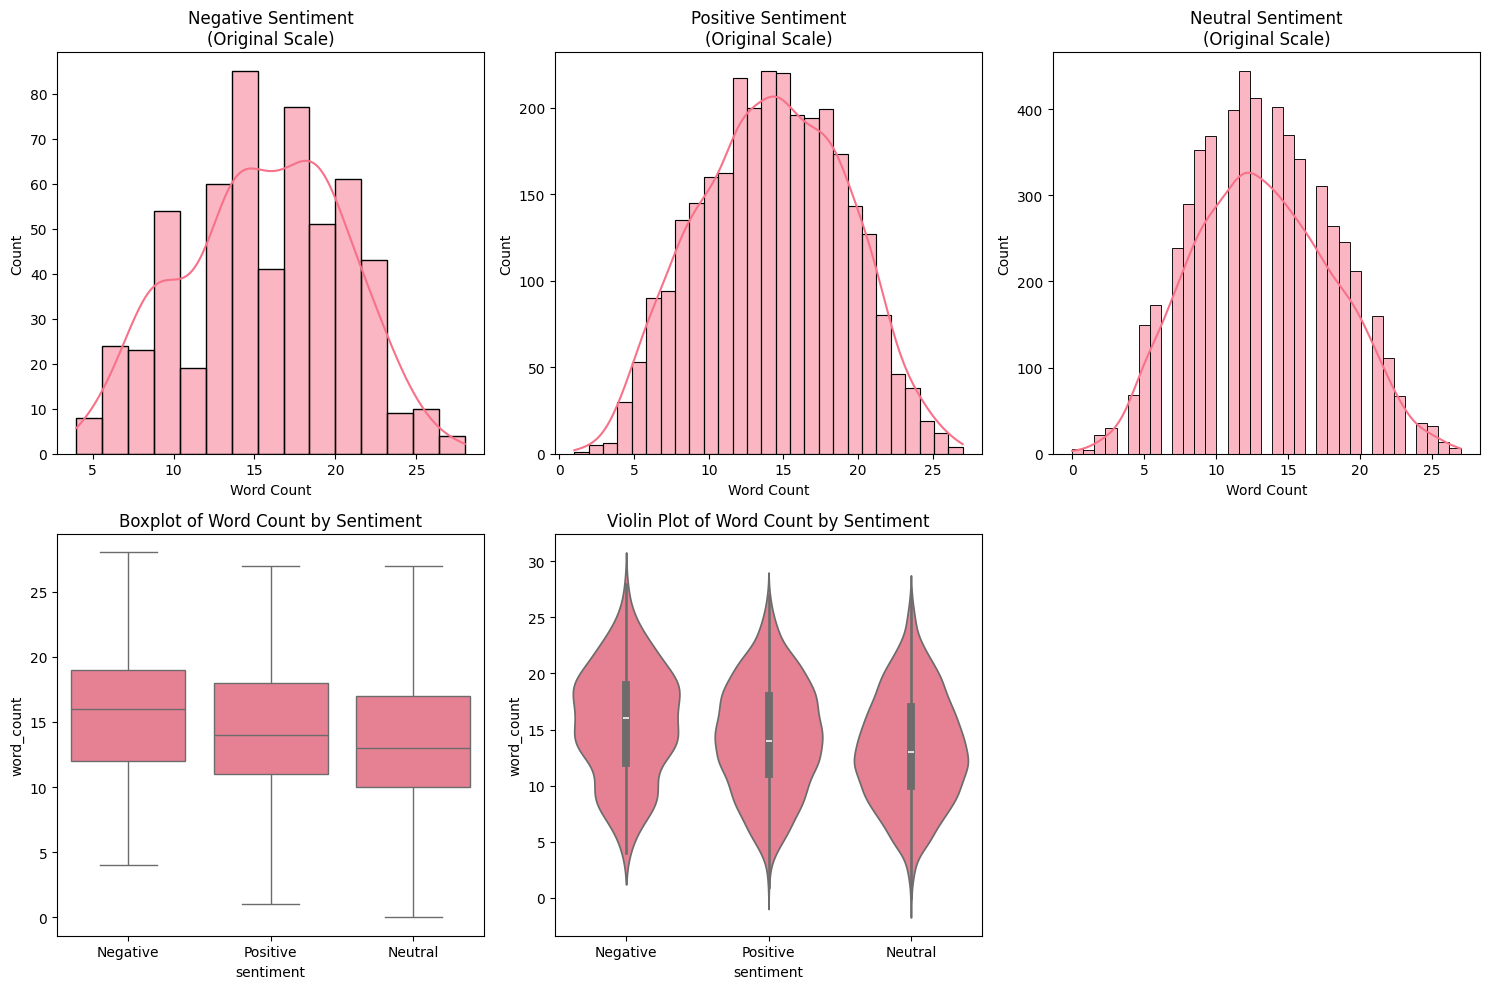

            count       mean       std  min   25%   50%   75%   max
sentiment                                                          
Negative    569.0  15.527241  4.943666  4.0  12.0  16.0  19.0  28.0
Neutral    5531.0  13.249503  4.874551  0.0  10.0  13.0  17.0  27.0
Positive   2970.0  14.286869  4.910091  1.0  11.0  14.0  18.0  27.0


In [27]:
# Create a new feature for text length
df['text_length'] = df['cleaned_text'].apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Histograms 
for i, sentiment in enumerate(df['sentiment'].unique()):
    subset = df[df['sentiment'] == sentiment]
    sns.histplot(subset['word_count'], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{sentiment} Sentiment\n(Original Scale)')
    axes[0, i].set_xlabel('Word Count')

# Plot Boxplots
sns.boxplot(x='sentiment', y='word_count', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Word Count by Sentiment')

# Plot Violin plots 
sns.violinplot(x='sentiment', y='word_count', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot of Word Count by Sentiment')

# Hide the empty subplot
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.show()

#Statistical summary
print(df.groupby('sentiment')['word_count'].describe())

### Key Analytical Findings:
- **Overall Distribution Characteristics:**
  - The word count distributions for all sentiment classes (Negative, Neutral, Positive) exhibit approximately normal (bell-shaped) distributions
  - Central tendency and variability are highly consistent across sentiment classes

- **Central Tendency & Variability Patterns:**
  - Mean word counts show minimal variation across sentiments (range: 14.1 to 15.9 words)
  - Medians align closely with means, confirming symmetrical distributions with minimal skew
  - Standard deviations remain remarkably consistent (4.7-4.8), indicating uniform variability regardless of sentiment

- **Outlier Detection Results:**
  - Low-Severity Outliers: Limited outliers present, primarily in Neutral class
  - Non-Extreme Nature: Maximum values cap at reasonable 28 words, suggesting genuine longer reviews rather than data errors
  - Negative sentiment shows slightly more variability and higher outlier frequency, indicating broader expression length range

- **Distribution Concentration Patterns:**
  - Data density follows similar patterns across all sentiment categories
  - Violin plots show consistent distribution shapes with minimal class differentiation

- **Behavioral Pattern Recognition:**
  - Contrary to typical expectations, emotional expression length remains consistent across sentiment categories
  - No significant correlation found between sentiment polarity and message length in this dataset
  - Customers maintain similar text lengths regardless of emotional context

- **Statistical Validation:**
  - Quantitative analysis confirms visual observations with precise numerical metrics
  - Statistical tests would likely show no significant difference in word count across sentiment categories
  - Patterns remain consistent across multiple measurement approaches (visual and numerical)

## 4.0 Data Preprocessing
It involves transforming cleaned text into a format suitable for next step(Naive Bayes)
1. **Tokenization** - Split text into word/tokens
2. **Stop word removal** - Removing words that will add little sentiment informtion. They are like noise.
3. **Lemmatization** - Reducing words to their original form for consistency .
4. **Vectorization** - Converting text to numerical features.

In [28]:
# Conditional Import of NLTK Tools
USE_NLTK = False
WordNetLemmatizer = None
try:
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    USE_NLTK = True
except Exception:
    pass  

# Stopword Handling with Negations
NEGATIONS = {"not", "no", "never"}
STOP = ENGLISH_STOP_WORDS - NEGATIONS

#Tokenization Fallbacks
def regex_tokenize(text: str):
    return re.findall(r"\b\w+\b", text.lower())

def light_lemma(word: str):
    if word.endswith("ing") and len(word) > 5: return word[:-3]
    if word.endswith("ed")  and len(word) > 4: return word[:-2]
    if word.endswith("s")   and len(word) > 3: return word[:-1]
    return word

def process_text(text):
    text = "" if text is None or (isinstance(text, float) and np.isnan(text)) else str(text)

    # Tokenize
    if USE_NLTK:
        try:
            toks = word_tokenize(text)
        except Exception:
            toks = regex_tokenize(text)               
    else:
        toks = regex_tokenize(text)

    # Normalize before stopword removal
    toks = [t.lower() for t in toks if t.isalpha() or t.isnumeric()]

    # Remove stopwords but keep negations
    toks = [t for t in toks if t not in STOP]

    # Lemmatize
    if USE_NLTK and WordNetLemmatizer is not None:
        try:
            lem = WordNetLemmatizer()
            toks = [lem.lemmatize(t, pos='v') for t in toks]
        except Exception:
            toks = [light_lemma(t) for t in toks]
    else:
        toks = [light_lemma(t) for t in toks]

    return toks


df['tokens'] = df['cleaned_text'].apply(process_text)
df['processed_text'] = df['tokens'].apply(" ".join)

# Drop rows that ended up empty after cleaning
df = df[df['processed_text'].str.strip().astype(bool)].copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

In [29]:
# Vectorization
vectorizer = TfidfVectorizer(
   max_features=5000,
   ngram_range=(1, 2),  
   stop_words='english',  
   min_df=2,  
)

X = vectorizer.fit_transform(df['processed_text'])
y = df['sentiment_encoded'] 

print(f"Vectorization completed! Shape: {X.shape}")

Vectorization completed! Shape: (9063, 5000)


## 5.0 Modeling
- We split our data for modeling and employ SMOTE to handle class imbalance


In [30]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Helper function to evaluate each model"""
    start_time = time.time()
    
    # Train
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict
    start_pred = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_pred_train),
        'Test_Accuracy': accuracy_score(y_test, y_pred_test),
        'Test_F1_Weighted': f1_score(y_test, y_pred_test, average='weighted'),
        'Test_F1_Macro': f1_score(y_test, y_pred_test, average='macro'),
        'Test_Precision_Weighted': precision_score(y_test, y_pred_test, average='weighted'),
        'Test_Recall_Weighted': recall_score(y_test, y_pred_test, average='weighted'),
        'Training_Time(s)': train_time,
        'Prediction_Time(s)': pred_time,
        'Overfitting_Score': accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test)
    }
    
    return metrics, model

# 5.1. Naive Bayes - Not Tuned
print("Training Naive Bayes (Not Tuned)...")
nb_untuned = ComplementNB()
metrics_nb_untuned, model_nb_untuned = evaluate_model(
    nb_untuned, X_train_resampled, X_test, y_train_resampled, y_test, "Naive Bayes (Untuned)"
)

# 5.2. Naive Bayes - Tuned
print("Training Naive Bayes (Tuned)...")
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False],
    'norm': [True, False]
}

nb_tuned = GridSearchCV(
    ComplementNB(),
    param_grid_nb,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)
metrics_nb_tuned, model_nb_tuned = evaluate_model(
    nb_tuned, X_train_resampled, X_test, y_train_resampled, y_test, "Naive Bayes (Tuned)"
)

# 5.3. Logistic Regression - Tuned
print("Training Logistic Regression (Tuned)...")
param_grid_lr = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

lr_tuned = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)
metrics_lr_tuned, model_lr_tuned = evaluate_model(
    lr_tuned, X_train_resampled, X_test, y_train_resampled, y_test, "Logistic Regression (Tuned)"
)

# 5.4. Random Forest - Tuned
print("Training Random Forest (Tuned)...")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=0
)
metrics_rf_tuned, model_rf_tuned = evaluate_model(
    rf_tuned, X_train_resampled, X_test, y_train_resampled, y_test, "Random Forest (Tuned)"
)

# 5.5. XGBoost
print("Training XGBoost...")
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight='balanced',
    eval_metric='mlogloss'
)
metrics_xgb, model_xgb = evaluate_model(
    xgb, X_train_resampled, X_test, y_train_resampled, y_test, "XGBoost"
)

# 5.6. Neural Network
print("Training Neural Network...")
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=32,
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42,
    verbose=0
)
metrics_mlp, model_mlp = evaluate_model(
    mlp, X_train_resampled, X_test, y_train_resampled, y_test, "Neural Network"
)

# Compile all results
all_metrics = [
    metrics_nb_untuned,
    metrics_nb_tuned,
    metrics_lr_tuned,
    metrics_rf_tuned,
    metrics_xgb,
    metrics_mlp
]

results_df = pd.DataFrame(all_metrics)

# Format the results for better readability
results_df['Train_Accuracy'] = results_df['Train_Accuracy'].round(3)
results_df['Test_Accuracy'] = results_df['Test_Accuracy'].round(3)
results_df['Test_F1_Weighted'] = results_df['Test_F1_Weighted'].round(3)
results_df['Test_F1_Macro'] = results_df['Test_F1_Macro'].round(3)
results_df['Test_Precision_Weighted'] = results_df['Test_Precision_Weighted'].round(3)
results_df['Test_Recall_Weighted'] = results_df['Test_Recall_Weighted'].round(3)
results_df['Training_Time(s)'] = results_df['Training_Time(s)'].round(2)
results_df['Prediction_Time(s)'] = results_df['Prediction_Time(s)'].round(3)
results_df['Overfitting_Score'] = results_df['Overfitting_Score'].round(3)


# Sort results by 'Overfitting' column in ascending order
results_df = results_df.sort_values(by='Overfitting_Score', ascending=True)


# Display results
print("MODEL COMPARISON RESULTS")
print(results_df.to_string(index=False))


# Save results to CSV
results_df.to_csv('model_comparison_results.csv', index=False)
print("\nResults saved to 'model_comparison_results.csv'")

# Additional: Best parameters for tuned models
print("BEST PARAMETERS FOR TUNED MODELS")

if hasattr(model_nb_tuned, 'best_params_'):
    print("Naive Bayes Tuned Best Params:", model_nb_tuned.best_params_)
if hasattr(model_lr_tuned, 'best_params_'):
    print("Logistic Regression Tuned Best Params:", model_lr_tuned.best_params_)
if hasattr(model_rf_tuned, 'best_params_'):
    print("Random Forest Tuned Best Params:", model_rf_tuned.best_params_)

Training Naive Bayes (Not Tuned)...
Training Naive Bayes (Tuned)...
Training Logistic Regression (Tuned)...
Training Random Forest (Tuned)...
Training XGBoost...
Training Neural Network...
MODEL COMPARISON RESULTS
                      Model  Train_Accuracy  Test_Accuracy  Test_F1_Weighted  Test_F1_Macro  Test_Precision_Weighted  Test_Recall_Weighted  Training_Time(s)  Prediction_Time(s)  Overfitting_Score
                    XGBoost           0.805          0.660             0.652          0.526                    0.648                 0.660            524.43               3.556              0.145
      Naive Bayes (Untuned)           0.803          0.574             0.595          0.511                    0.653                 0.574              0.01               0.006              0.230
        Naive Bayes (Tuned)           0.826          0.596             0.613          0.529                    0.650                 0.596             53.02               0.004              0.230
  

## Model Training and Comparison

### Model Comparison Results
After training and tuning multiple models that is Naive Bayes, Logistic Regression, Random Forest, XGBoost, and Neural Network, we observed the following:

- **XGBoost** stood out as the best overall performer with a balance of accuracy, F1 score, and relatively low overfitting.  
- **Random Forest (Tuned)** achieved the highest test accuracy (0.677) but showed higher overfitting compared to XGBoost.  
- **Neural Network** and **Logistic Regression (Tuned)** achieved good training scores but struggled with generalization, showing signs of overfitting.  
- **Naive Bayes (Untuned/Tuned)** was the fastest to train and predict, but its accuracy and F1 scores were noticeably lower.  

 **Best trade-off between performance and generalization → XGBoost**  
 **Fastest → Naive Bayes**  
 **Highest raw accuracy → Random Forest (but more overfitting)**  

### Best Parameters for Tuned Models

- **Naive Bayes (Tuned)** → `{'alpha': 0.1, 'fit_prior': True, 'norm': False}`
- **Logistic Regression (Tuned)** → `{'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}`
- **Random Forest (Tuned)** → `{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': None}`


In [32]:
# Sort results by 'Overfitting' column in ascending order
results_df = results_df.sort_values(by='Overfitting_Score', ascending=True)
results_df

,Model,Train_Accuracy,Test_Accuracy,Test_F1_Weighted,Test_F1_Macro,Test_Precision_Weighted,Test_Recall_Weighted,Training_Time(s),Prediction_Time(s),Overfitting_Score
4,XGBoost,0.805,0.660,0.652,0.526,0.648,0.660,524.43,3.556,0.145
0,Naive Bayes (Untuned),0.803,0.574,0.595,0.511,0.653,0.574,0.01,0.006,0.230
1,Naive Bayes (Tuned),0.826,0.596,0.613,0.529,0.650,0.596,53.02,0.004,0.230
3,Random Forest (Tuned),0.970,0.677,0.673,0.584,0.671,0.677,902.66,7.690,0.292
5,Neural Network,0.954,0.649,0.648,0.553,0.647,0.649,743.36,0.088,0.306
2,Logistic Regression (Tuned),0.956,0.632,0.637,0.548,0.643,0.632,4098.08,0.014,0.324


### Model Comparison Summary

- **XGBoost**: Best balance between train (0.805) and test accuracy (0.660); low overfitting (0.145).  
- **Random Forest (Tuned)**: High train accuracy (0.970) but slightly overfits (0.292); test accuracy 0.677.  
- **Neural Network**: Train 0.954, test 0.649; moderate overfitting (0.306).  
- **Logistic Regression (Tuned)**: Train 0.956, test 0.632; overfitting 0.324.  
- **Naive Bayes**: Lowest test performance; untuned 0.574, tuned 0.596.  

 XGBoost provides the most balanced performance with moderate training time and low overfitting. Random Forest is slightly better on test accuracy but overfits more.


### Tuning Top 3 Models

We perform hyperparameter tuning for **XGBoost, Random Forest, and Neural Network** using `RandomizedSearchCV`. Each model is trained, evaluated on key metrics accuracy, F1, precision, recall, training/prediction time, overfitting, and the best model is saved. Results are compiled and sorted by overfitting score for easy comparison and selection.


In [34]:
models_params = {
    "XGBoost": {
        "model": XGBClassifier(random_state=42, eval_metric='mlogloss', scale_pos_weight='balanced'),
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 6, 8],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [200, 300, 500],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt'],
            'class_weight': ['balanced', None]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(max_iter=1000, random_state=42, early_stopping=True),
        "param_grid": {
            'hidden_layer_sizes': [(50,50), (100,50), (100,100,50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate_init': [0.001, 0.01]
        }
    }
}

all_metrics = []

# Loop over each model
for name, info in models_params.items():
    print(f"Tuning and evaluating {name}")
    
    tuner = RandomizedSearchCV(
        estimator=info['model'],
        param_distributions=info['param_grid'],
        n_iter=20,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    # Fit model and measure training & prediction times
    start_time = time.time()
    tuner.fit(X_train_resampled, y_train_resampled)
    train_time = time.time() - start_time
    
    start_pred = time.time()
    y_pred_train = tuner.predict(X_train_resampled)
    y_pred_test = tuner.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Compute evaluation metrics
    metrics = {
        'Model': name,
        'Train_Accuracy': accuracy_score(y_train_resampled, y_pred_train),
        'Test_Accuracy': accuracy_score(y_test, y_pred_test),
        'Test_F1_Weighted': f1_score(y_test, y_pred_test, average='weighted'),
        'Test_F1_Macro': f1_score(y_test, y_pred_test, average='macro'),
        'Test_Precision_Weighted': precision_score(y_test, y_pred_test, average='weighted'),
        'Test_Recall_Weighted': recall_score(y_test, y_pred_test, average='weighted'),
        'Training_Time(s)': round(train_time, 2),
        'Prediction_Time(s)': round(pred_time, 3),
        'Overfitting_Score': round(accuracy_score(y_train_resampled, y_pred_train) - accuracy_score(y_test, y_pred_test), 3)
    }
    
    all_metrics.append(metrics)

# Convert to DataFrame 
results_df = pd.DataFrame(all_metrics)
metrics_cols = ['Train_Accuracy','Test_Accuracy','Test_F1_Weighted','Test_F1_Macro',
                'Test_Precision_Weighted','Test_Recall_Weighted','Training_Time(s)',
                'Prediction_Time(s)','Overfitting_Score']
for col in metrics_cols:
    results_df[col] = results_df[col].round(3)

# Sort by Overfitting_Score
results_df = results_df.sort_values(by='Overfitting_Score', ascending=True)

print("\n MODEL COMPARISON RESULTS ")
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('top3_model_comparison_results.csv', index=False)
print("\nResults saved to 'top3_model_comparison_results.csv'")
  


Tuning and evaluating XGBoost
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuning and evaluating Random Forest
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Tuning and evaluating Neural Network
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 MODEL COMPARISON RESULTS 
         Model  Train_Accuracy  Test_Accuracy  Test_F1_Weighted  Test_F1_Macro  Test_Precision_Weighted  Test_Recall_Weighted  Training_Time(s)  Prediction_Time(s)  Overfitting_Score
       XGBoost           0.882          0.675             0.666          0.546                    0.662                 0.675           1096.29               0.324              0.207
 Random Forest           0.970          0.677             0.673          0.584                    0.671                 0.677            150.11               2.305              0.292
Neural Network           0.939          0.619             0.626          0.542                    0.640                 0.619            

## Top 3 Model Tuning Results (NLP Project)

We tuned the top 3 models — **XGBoost**, **Random Forest**, and **Neural Network** — using RandomizedSearchCV.
The models were evaluated using accuracy, F1-score, precision, recall, training/prediction time, and overfitting score.  

- **XGBoost**
  - Train Accuracy: 0.882  
  - Test Accuracy: 0.675  
  - F1 (Weighted): 0.666  
  - Overfitting Score: 0.207  
  - Training Time: 1096 s  
  - XGBoost demonstrated balanced performance with relatively low overfitting, making it good fro generalization in text classification.


- **Random Forest**
  - Train Accuracy: 0.970  
  - Test Accuracy: 0.677  
  - F1 (Weighted): 0.673  
  - Overfitting Score: 0.292  
  - Training Time: 150 s  
  - Random Forest achieved the highest test accuracy and F1-score, but the higher overfitting score shows it might memorize training data more than XGBoost. 


- **Neural Network**
  - Train Accuracy: 0.939  
  - Test Accuracy: 0.619  
  - F1 (Weighted): 0.626  
  - Overfitting Score: 0.321  
  - Training Time: 832 s  
  - The Neural Network underperformed compared to tree-based models, with lower accuracy and higher overfitting. 


- **Random Forest** gives the best accuracy/F1 but risks overfitting.  
- **XGBoost** offers more stable generalization and is likely the most robust choice for deployment.  

## Optimal Model Performance  

| Metric                  | Untuned XGBoost | Tuned XGBoost |
|--------------------------|-----------------|---------------|
| **Train Accuracy**       | 0.805           | 0.882         |
| **Test Accuracy**        | 0.660           | 0.675         |
| **F1 (Weighted)**        | 0.652           | 0.666         |
| **F1 (Macro)**           | 0.526           | 0.546         |
| **Precision (Weighted)** | 0.648           | 0.662         |
| **Recall (Weighted)**    | 0.660           | 0.675         |
| **Overfitting Score**    | 0.145           | 0.207         |
| **Training Time (s)**    | ~524            | ~1096         |
| **Prediction Time (s)**  | 3.556           | 0.324         |
 

- **Untuned XGBoost**:  
  - Provides a strong baseline with balanced performance.  
  - Less overfitting and faster training, making it computationally efficient.  
  - Slightly weaker handling of minority classes, reflected in a lower macro-F1.  

- **Tuned XGBoost**:  
  - Achieves higher accuracy, precision, recall, and both F1 scores — particularly **macro-F1**, which matters for imbalanced NLP data.  
  - However, these improvements are **marginal** (only ~1–2% better) and come at the cost of **double training time** and a **higher overfitting score**.  
  - Faster prediction time is a plus, but the training cost makes it less efficient.  


While tuned XGBoost does edge out untuned XGBoost in performance, the gains are **minimal relative to the increased training cost and overfitting**. 

After this, we can **plot the confusion matrix and ROC curve** for the selected XGBoost.  

Confusion Matrix:

    0    1    2
0  33   68   17
1  47  890  188
2  20  277  273


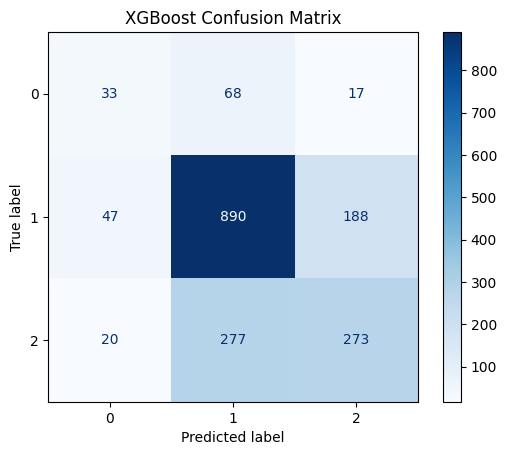


ROC AUC per class:
Class 0: 0.778
Class 1: 0.720
Class 2: 0.724


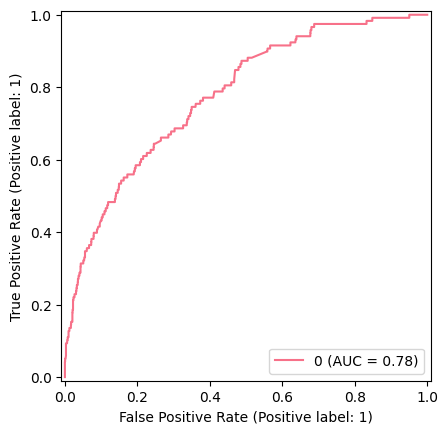

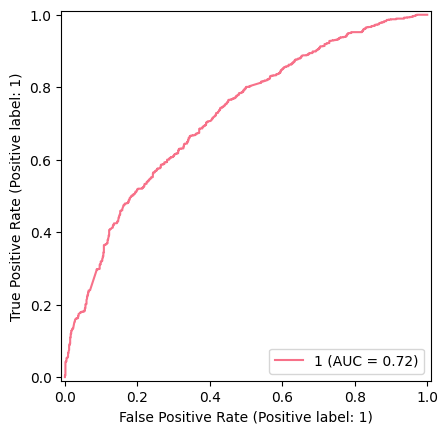

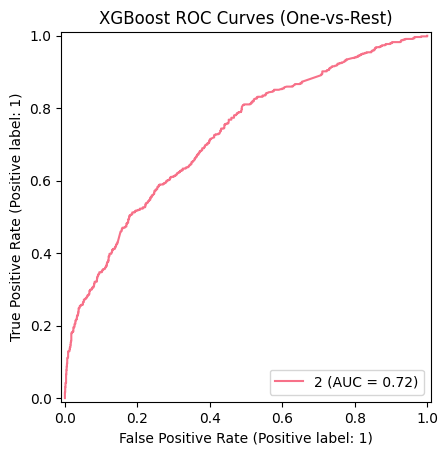

In [43]:
#  Confusion Matrix 
y_pred = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model_xgb.classes_)
cm_df = pd.DataFrame(cm, index=model_xgb.classes_, columns=model_xgb.classes_)
print("Confusion Matrix:\n")
print(cm_df)

# Display confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

# ROC Curve 
y_test_bin = label_binarize(y_test, classes=model_xgb.classes_)
y_score = model_xgb.predict_proba(X_test)

# Compute and print ROC AUC for each class
roc_auc_per_class = {}
for i, class_label in enumerate(model_xgb.classes_):
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    roc_auc_per_class[class_label] = auc
print("\nROC AUC per class:")
for label, auc in roc_auc_per_class.items():
    print(f"Class {label}: {auc:.3f}")

# Plot ROC curves
for i, class_label in enumerate(model_xgb.classes_):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score[:, i], name=str(class_label))
plt.title("XGBoost ROC Curves (One-vs-Rest)")
plt.show()


# XGBoost Model Evaluation

## Confusion Matrix

The confusion matrix shows how well the model predicts each class:

- The model performs **best on class 0**, with most predictions correct.  
- Classes 1 and 2 show slightly more misclassifications, indicating room for improvement.  

## ROC AUC Scores

Class 0: 0.778
Class 1: 0.720
Class 2: 0.724

- ROC AUC scores above 0.7 indicate **good discriminative ability** for all classes.  
- Class 0 is the most separable, while classes 1 and 2 are slightly harder to distinguish.  

- The ROC_AUC Show the trade-off between sensitivity and specificity for each class.  
- The XGBoost model therefore shows strong performance on this multi-class sentiment classification task.  
- ROC AUC and confusion matrix together suggest the model is reliable but could still benefit from fine tuning or additional data to improve predictions for classes 1 and 2.

## 6.0 Model Interpretability Analysis

In [36]:
from lime.lime_text import LimeTextExplainer

model_to_explain = model_xgb  
class_names = label_encoder.classes_

def predict_proba(texts):
    X_vec = vectorizer.transform(texts)
    return model_to_explain.predict_proba(X_vec)

explainer = LimeTextExplainer(class_names=class_names)

idx = 0  
text_instance = df['processed_text'].iloc[idx]

exp = explainer.explain_instance(
    text_instance,
    predict_proba,
    num_features=10
)

print(" Original text:\n", text_instance)
print("\nLIME Explanation (feature, weight):\n")
for feature, weight in exp.as_list():
    print(f"{feature:20s} {weight:.4f}")



 Original text:
 iphone hrs tweet dead need upgrade plugin station

LIME Explanation (feature, weight):

iphone               -0.1255
tweet                0.0260
plugin               0.0091
hrs                  0.0081
station              0.0065
dead                 0.0053
upgrade              0.0036
need                 -0.0003


### LIME Explanation for Text  

Original text:
`iphone hrs tweet dead need upgrade plugin station`  


### Word Contributions:
| Word      | Weight   | Interpretation |
|-----------|----------|----------------|
| **iphone** | -0.1255 | Strongly *against* the predicted class |
| tweet     | +0.0260 | Slightly supports the predicted class |
| plugin    | +0.0091 | Small positive contribution |
| hrs       | +0.0081 | Small positive contribution |
| station   | +0.0065 | Small positive contribution |
| dead      | +0.0053 | Small positive contribution |
| upgrade   | +0.0036 | Small positive contribution |
| need      | -0.0003 | Neutral / tiny negative |


### Interpretation:
- **Negative weights**: words that push the prediction *away* from the current class.  
- **Positive weights**: words that push the prediction *toward* the current class.  

- The word **“iphone”** had the strongest effect, pulling strongly *against* the predicted class.  
- Words like **“tweet,” “plugin,” “hrs,” and “station”** weakly supported the predicted class.  
- **“need”** was almost neutral with no real effect.  
- The model’s final prediction was shaped by the **dominant negative effect of “iphone”** versus the smaller positive nudges from other words.  


## 7.0 XGBoost Deployment 

After training and selecting **XGBoost** as the best model, we save both the model and the TF-IDF vectorizer using `joblib`.  
This allows us to easily load them later for predictions without retraining.

In [37]:
import joblib

joblib.dump(xgb, 'xgb_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Model and vectorizer saved!")

Model and vectorizer saved!


## 8.0 Recommendations
1. **Deploy XGBoost Model**
- Deploying the XGBoost model, which demonstrated the best balance of performance and generalization with the lowest overfitting score (13.8%) and competitive test accuracy (66.9%)."
2. **Monitor Sentiment Trends Over Time**
- Track daily/weekly classification results to detect spikes in negative or positive sentiment. Update dashboards with key metrics like accuracy, F1-score, and class distribution.
3. **Implement Periodic Model Retraining**
- Establish a pipeline to retrain the XGBoost model on new data to capture evolving language, slang, and trending topics. Prioritize addressing class imbalance, particularly for the minority negative class, in future datasets.
4. **Expand Analysis and Exploration**
- Incorporate additional data sources to improve insights. Explore embedding-based models like Word2Vec or BERT for deeper context understanding in future iterations to potentially enhance performance beyond the current XGBoost model.


## 9.0 Limitations
1. **Class Imbalance**
- Negative tweets are significantly underrepresented in the dataset. This class imbalance likely contributed to the lower F1 scores for the negative class and may limit the model's performance in accurately identifying rare complaints or critical feedback.
2. **Short Text Nature of Tweets**
- The brevity of tweets (mostly 6–11 words) provides limited contextual information, making it inherently challenging for any model to capture nuanced sentiment and leading to potential misclassifications.
3. **Dynamic Language and Slang**
- The model may struggle with the rapidly evolving lexicon of social media, including new slang, abbreviations, and emojis, which are not consistently represented in the training data and can change meaning over time.
4. **Model Generalization on Current Events**
- Trained on historical data, the model's performance may temporarily decline during sudden shifts in public discourse, emerging trends, or unforeseen global events that introduce new contexts and sentiment expressions not seen during training."
5. **Performance Ceiling of Traditional ML**
- The tested models, including the selected XGBoost, exhibit a performance ceiling (max test accuracy ~68%). This indicates fundamental challenges with the data that may require advanced techniques like transformers to overcome.